In [1]:
import matplotlib.pyplot as plt
import numpy as np
import eispac
import astropy.units as u
from astropy.nddata import StdDevUncertainty
from specutils import Spectrum1D
from specutils.manipulation import SplineInterpolatedResampler
import h5py
from juanfit import SpectrumFitSingle

In [27]:
with h5py.File("../../sav/EIS/EQSPY/Atlas30_tiltcorr_crop.h5", 'r') as hf:
    data_cube_0 = hf["data_cube_0"][:]
    err_cube_0 = hf["err_cube_0"][:]
    wvl_cube_0 = hf["wvl_cube_0"][:]

    data_cube_1 = hf["data_cube_1"][:]
    err_cube_1 = hf["err_cube_1"][:]
    wvl_cube_1 = hf["wvl_cube_1"][:]

    data_cube_2 = hf["data_cube_2"][:]
    err_cube_2 = hf["err_cube_2"][:]
    wvl_cube_2 = hf["wvl_cube_2"][:]

    data_cube_3 = hf["data_cube_3"][:]
    err_cube_3 = hf["err_cube_3"][:]
    wvl_cube_3 = hf["wvl_cube_3"][:]

    ccd_offset_0 = hf["ccd_offset_0"][:]
    ccd_offset_1 = hf["ccd_offset_1"][:]
    ccd_offset_2 = hf["ccd_offset_2"][:]
    ccd_offset_3 = hf["ccd_offset_3"][:]
    fexii_195_bottom_left = hf["fexii_195_bottom_left"][:]
    slit_width = hf["slit_width"][:]

In [28]:
slit_width_aver = np.mean(slit_width)

In [3]:
ccd_offset_FeXII = ccd_offset_1[263]

In [4]:
data_cube_0.shape

(160, 16, 1024)

In [5]:
fexii_195_bottom_left

array([-931.76660824,  312.38156128])

In [6]:
ccd_offset_0

array([18.482306, 18.480537, 18.47877 , ..., 16.678743, 16.67698 ,
       16.675213], dtype=float32)

In [7]:
def return_mask(ccd_offset, ccd_offset_FeXII, FeXII_bl):
    xcoord = np.linspace(0,30,16) + FeXII_bl[0]
    ycoord = np.linspace(0,159,160) + FeXII_bl[1] + ccd_offset_FeXII - ccd_offset
    y_grid, x_grid = np.meshgrid(ycoord,xcoord,indexing="ij")
    height_grid = np.sqrt(y_grid**2 + x_grid**2)/950

    mask_1 = np.where((height_grid >= 1.035) & (height_grid < 1.06))
    mask_2 = np.where((height_grid >= 1.06) & (height_grid < 1.1))

    return mask_1, mask_2

In [8]:
FeXI_FeX_182_slice = slice(695,725)
FeXI_FeX_182_wvl = wvl_cube_0[FeXI_FeX_182_slice]

FeXI_FeX_182_region_1, FeXI_FeX_182_region_2 = return_mask(np.mean(ccd_offset_0[FeXI_FeX_182_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXI_FeX_182_data_region_1 = data_cube_0[FeXI_FeX_182_region_1[0],FeXI_FeX_182_region_1[1],FeXI_FeX_182_slice]
FeXI_FeX_182_data_region_2 = data_cube_0[FeXI_FeX_182_region_2[0],FeXI_FeX_182_region_2[1],FeXI_FeX_182_slice]
FeXI_FeX_182_err_region_1 = err_cube_0[FeXI_FeX_182_region_1[0],FeXI_FeX_182_region_1[1],FeXI_FeX_182_slice]
FeXI_FeX_182_err_region_2 = err_cube_0[FeXI_FeX_182_region_2[0],FeXI_FeX_182_region_2[1],FeXI_FeX_182_slice]

FeXI_FeX_182_data_aver_r1 = np.nanmean(FeXI_FeX_182_data_region_1, axis=0)
FeXI_FeX_182_data_aver_r2 = np.nanmean(FeXI_FeX_182_data_region_2, axis=0)
FeXI_FeX_182_data_aver_all = np.nanmean(data_cube_0[:,:,FeXI_FeX_182_slice], axis=(0,1))

FeXI_FeX_182_err_aver_r1 = np.sqrt(np.nanmean(FeXI_FeX_182_err_region_1**2,axis=0))/np.sqrt(FeXI_FeX_182_err_region_1.shape[0])
FeXI_FeX_182_err_aver_r2 = np.sqrt(np.nanmean(FeXI_FeX_182_err_region_2**2,axis=0))/np.sqrt(FeXI_FeX_182_err_region_2.shape[0])
FeXI_FeX_182_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeXI_FeX_182_slice]**2,axis=(0,1)))/np.sqrt(160*16)

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{x} 174 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.06]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

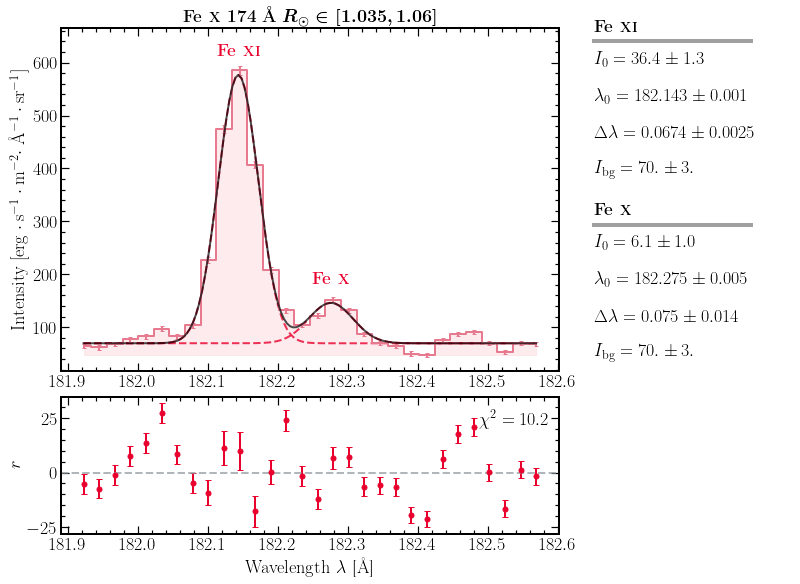

In [9]:
FeXI_FeX_182_fitmodel_r1 = SpectrumFitSingle(data=FeXI_FeX_182_data_aver_r1, wvl=FeXI_FeX_182_wvl,err=FeXI_FeX_182_err_aver_r1,
                                        line_number=2,same_width=False,line_wvl_init=[182.15,182.3],int_max_init=[200,100],fwhm_init=[0.07,0.07],)
FeXI_FeX_182_fitmodel_r1.run_lse(absolute_sigma=False)
FeXI_FeX_182_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{x} 174 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{x} 174 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.06,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

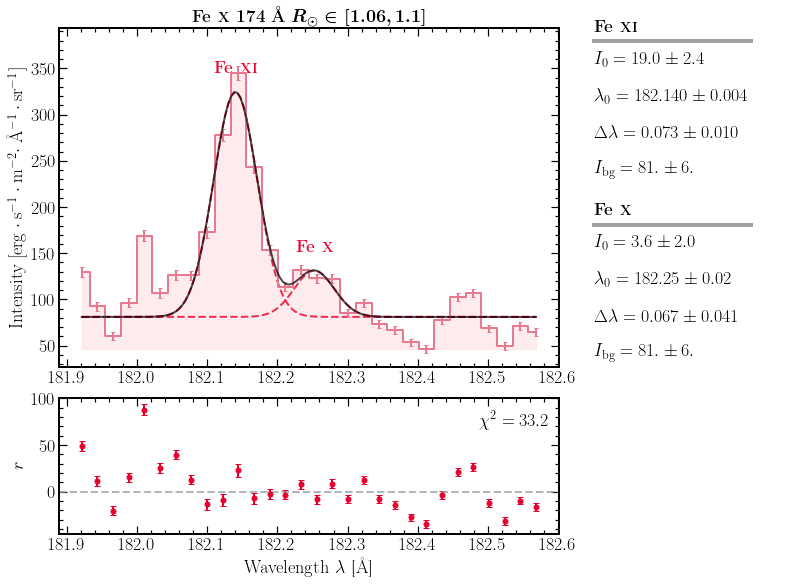

In [10]:
FeXI_FeX_182_fitmodel_r2 = SpectrumFitSingle(data=FeXI_FeX_182_data_aver_r2, wvl=FeXI_FeX_182_wvl,err=FeXI_FeX_182_err_aver_r2,
                                        line_number=2,same_width=False,line_wvl_init=[182.15,182.3],int_max_init=[200,100],fwhm_init=[0.07,0.07],)
FeXI_FeX_182_fitmodel_r2.run_lse(absolute_sigma=False)
FeXI_FeX_182_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{x} 174 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{x} 174 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

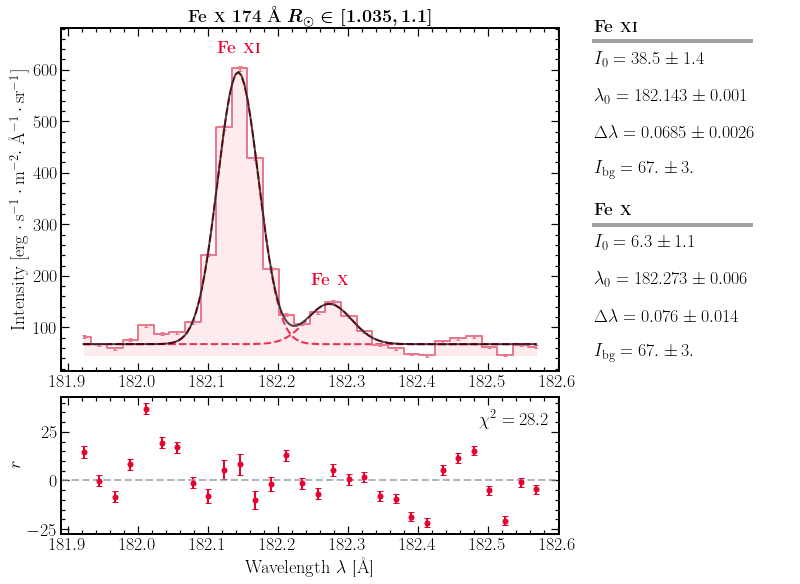

In [11]:
FeXI_FeX_182_fitmodel_all = SpectrumFitSingle(data=FeXI_FeX_182_data_aver_all, wvl=FeXI_FeX_182_wvl,err=FeXI_FeX_182_err_aver_all,
                                        line_number=2,same_width=False,line_wvl_init=[182.15,182.3],int_max_init=[200,100],fwhm_init=[0.07,0.07],)
FeXI_FeX_182_fitmodel_all.run_lse(absolute_sigma=False)
FeXI_FeX_182_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{x} 174 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

In [12]:
FeX_184_slice = slice(800,820)
FeX_184_wvl = wvl_cube_0[FeX_184_slice]

FeX_184_region_1, FeX_184_region_2 = return_mask(np.mean(ccd_offset_0[FeX_184_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeX_184_data_region_1 = data_cube_0[FeX_184_region_1[0],FeX_184_region_1[1],FeX_184_slice]
FeX_184_data_region_2 = data_cube_0[FeX_184_region_2[0],FeX_184_region_2[1],FeX_184_slice]
FeX_184_err_region_1 = err_cube_0[FeX_184_region_1[0],FeX_184_region_1[1],FeX_184_slice]
FeX_184_err_region_2 = err_cube_0[FeX_184_region_2[0],FeX_184_region_2[1],FeX_184_slice]

FeX_184_data_aver_r1 = np.nanmean(FeX_184_data_region_1, axis=0)
FeX_184_data_aver_r2 = np.nanmean(FeX_184_data_region_2, axis=0)
FeX_184_data_aver_all = np.nanmean(data_cube_0[:,:,FeX_184_slice], axis=(0,1))

FeX_184_err_aver_r1 = np.sqrt(np.nanmean(FeX_184_err_region_1**2,axis=0))/np.sqrt(FeX_184_err_region_1.shape[0])
FeX_184_err_aver_r2 = np.sqrt(np.nanmean(FeX_184_err_region_2**2,axis=0))/np.sqrt(FeX_184_err_region_2.shape[0])
FeX_184_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeX_184_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 25.9 mÅ


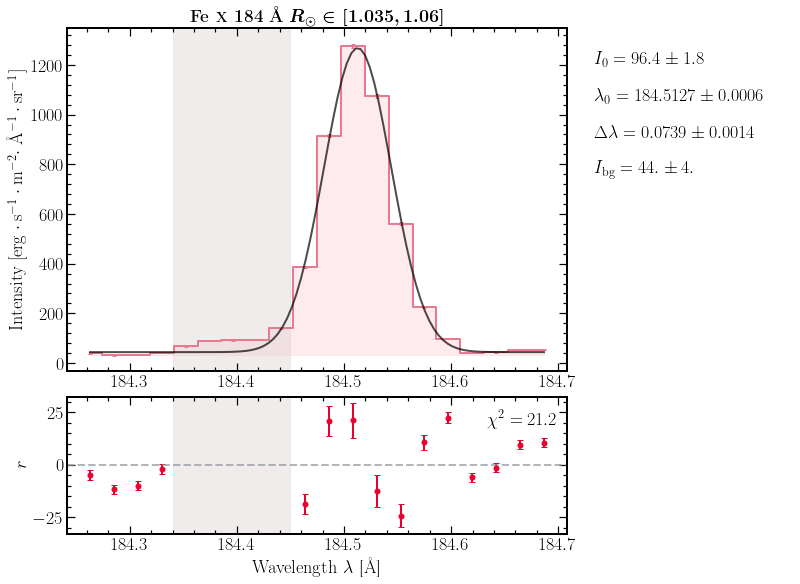

In [32]:
FeX_184_fitmodel_r1 = SpectrumFitSingle(data=FeX_184_data_aver_r1, wvl=FeX_184_wvl,err=FeX_184_err_aver_r1,
                                        line_number=1,line_wvl_init=[184.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        mask=[[184.34,184.45]])
FeX_184_fitmodel_r1.run_lse(absolute_sigma=False)
FeX_184_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 25.5 mÅ


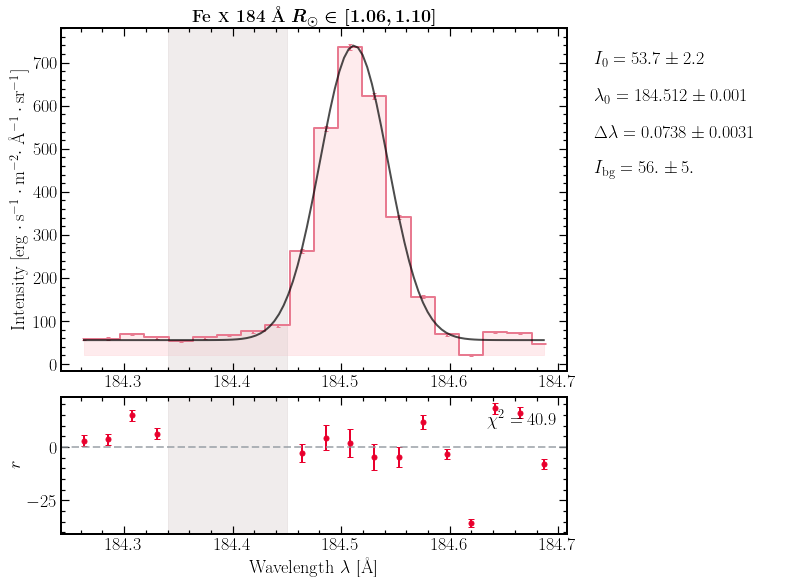

In [31]:
FeX_184_fitmodel_r2 = SpectrumFitSingle(data=FeX_184_data_aver_r2, wvl=FeX_184_wvl,err=FeX_184_err_aver_r2,
                                        line_number=1,line_wvl_init=[184.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        mask=[[184.34,184.45]])
FeX_184_fitmodel_r2.run_lse(absolute_sigma=False)
FeX_184_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.10]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 23.7 mÅ


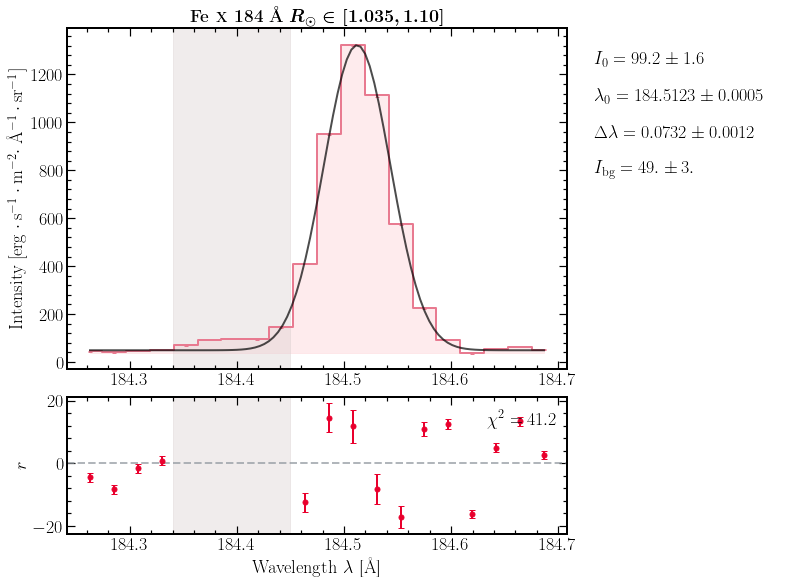

In [33]:
FeX_184_fitmodel_all = SpectrumFitSingle(data=FeX_184_data_aver_all, wvl=FeX_184_wvl,err=FeX_184_err_aver_all,
                                        line_number=1,line_wvl_init=[184.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        mask=[[184.34,184.45]])
FeX_184_fitmodel_all.run_lse(absolute_sigma=False)
FeX_184_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.10]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [16]:
FeVIII_185_slice = slice(833,850)
FeVIII_185_wvl = wvl_cube_0[FeVIII_185_slice]

FeVIII_185_region_1, FeVIII_185_region_2 = return_mask(np.mean(ccd_offset_0[FeVIII_185_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeVIII_185_data_region_1 = data_cube_0[FeVIII_185_region_1[0],FeVIII_185_region_1[1],FeVIII_185_slice]
FeVIII_185_data_region_2 = data_cube_0[FeVIII_185_region_2[0],FeVIII_185_region_2[1],FeVIII_185_slice]
FeVIII_185_err_region_1 = err_cube_0[FeVIII_185_region_1[0],FeVIII_185_region_1[1],FeVIII_185_slice]
FeVIII_185_err_region_2 = err_cube_0[FeVIII_185_region_2[0],FeVIII_185_region_2[1],FeVIII_185_slice]

FeVIII_185_data_aver_r1 = np.nanmean(FeVIII_185_data_region_1, axis=0)
FeVIII_185_data_aver_r2 = np.nanmean(FeVIII_185_data_region_2, axis=0)
FeVIII_185_data_aver_all = np.nanmean(data_cube_0[:,:,FeVIII_185_slice], axis=(0,1))

FeVIII_185_err_aver_r1 = np.sqrt(np.nanmean(FeVIII_185_err_region_1**2,axis=0))/np.sqrt(FeVIII_185_err_region_1.shape[0])
FeVIII_185_err_aver_r2 = np.sqrt(np.nanmean(FeVIII_185_err_region_2**2,axis=0))/np.sqrt(FeVIII_185_err_region_2.shape[0])
FeVIII_185_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeVIII_185_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 31.9 mÅ


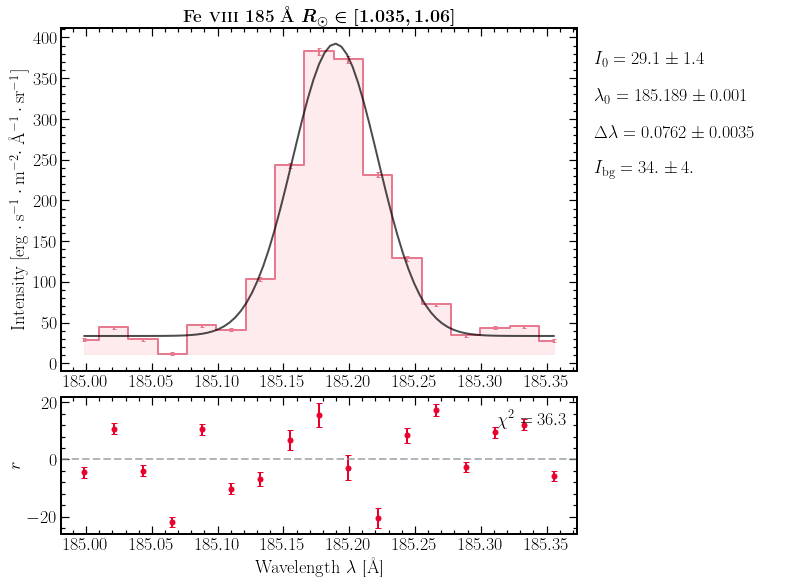

In [34]:
FeVIII_185_fitmodel_r1 = SpectrumFitSingle(data=FeVIII_185_data_aver_r1, wvl=FeVIII_185_wvl,err=FeVIII_185_err_aver_r1,
                                        line_number=1,line_wvl_init=[185.2],int_max_init=[1e3],fwhm_init=[0.07],
                                        )
FeVIII_185_fitmodel_r1.run_lse(absolute_sigma=False)
FeVIII_185_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 33.0 mÅ


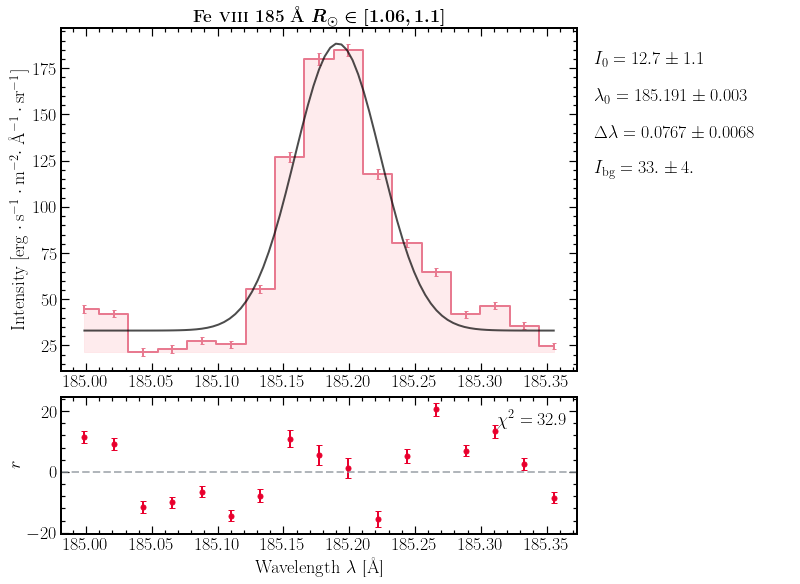

In [35]:
FeVIII_185_fitmodel_r2 = SpectrumFitSingle(data=FeVIII_185_data_aver_r2, wvl=FeVIII_185_wvl,err=FeVIII_185_err_aver_r2,
                                        line_number=1,line_wvl_init=[185.2],int_max_init=[1e3],fwhm_init=[0.07],
                                        )
FeVIII_185_fitmodel_r2.run_lse(absolute_sigma=False)
FeVIII_185_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 31.0 mÅ


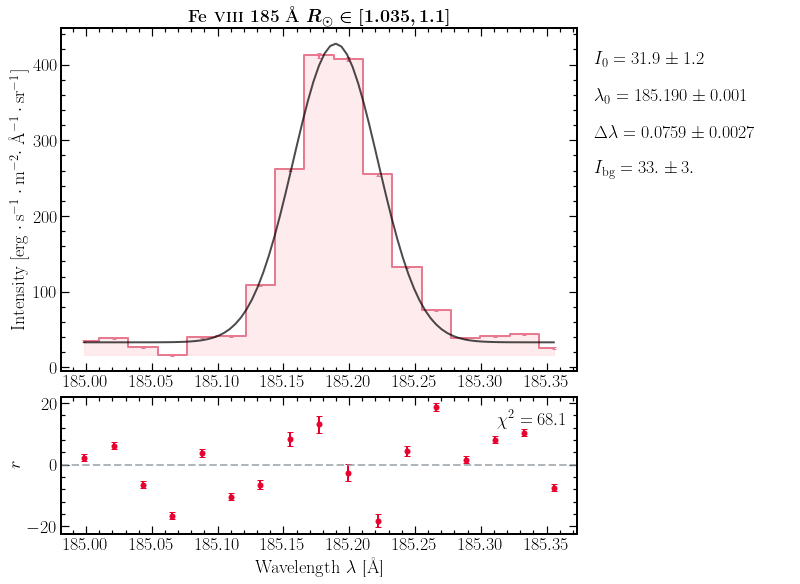

In [36]:
FeVIII_185_fitmodel_all = SpectrumFitSingle(data=FeVIII_185_data_aver_all, wvl=FeVIII_185_wvl,err=FeVIII_185_err_aver_all,
                                        line_number=1,line_wvl_init=[185.2],int_max_init=[1e3],fwhm_init=[0.07],
                                        )
FeVIII_185_fitmodel_all.run_lse(absolute_sigma=False)
FeVIII_185_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [42]:
FeVIII_186_slice = slice(898,912)
FeVIII_186_wvl = wvl_cube_0[FeVIII_186_slice]

FeVIII_186_region_1, FeVIII_186_region_2 = return_mask(np.mean(ccd_offset_0[FeVIII_186_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeVIII_186_data_region_1 = data_cube_0[FeVIII_186_region_1[0],FeVIII_186_region_1[1],FeVIII_186_slice]
FeVIII_186_data_region_2 = data_cube_0[FeVIII_186_region_2[0],FeVIII_186_region_2[1],FeVIII_186_slice]
FeVIII_186_err_region_1 = err_cube_0[FeVIII_186_region_1[0],FeVIII_186_region_1[1],FeVIII_186_slice]
FeVIII_186_err_region_2 = err_cube_0[FeVIII_186_region_2[0],FeVIII_186_region_2[1],FeVIII_186_slice]

FeVIII_186_data_aver_r1 = np.nanmean(FeVIII_186_data_region_1, axis=0)
FeVIII_186_data_aver_r2 = np.nanmean(FeVIII_186_data_region_2, axis=0)
FeVIII_186_data_aver_all = np.nanmean(data_cube_0[:,:,FeVIII_186_slice], axis=(0,1))

FeVIII_186_err_aver_r1 = np.sqrt(np.nanmean(FeVIII_186_err_region_1**2,axis=0))/np.sqrt(FeVIII_186_err_region_1.shape[0])
FeVIII_186_err_aver_r2 = np.sqrt(np.nanmean(FeVIII_186_err_region_2**2,axis=0))/np.sqrt(FeVIII_186_err_region_2.shape[0])
FeVIII_186_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeVIII_186_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 28.1 mÅ


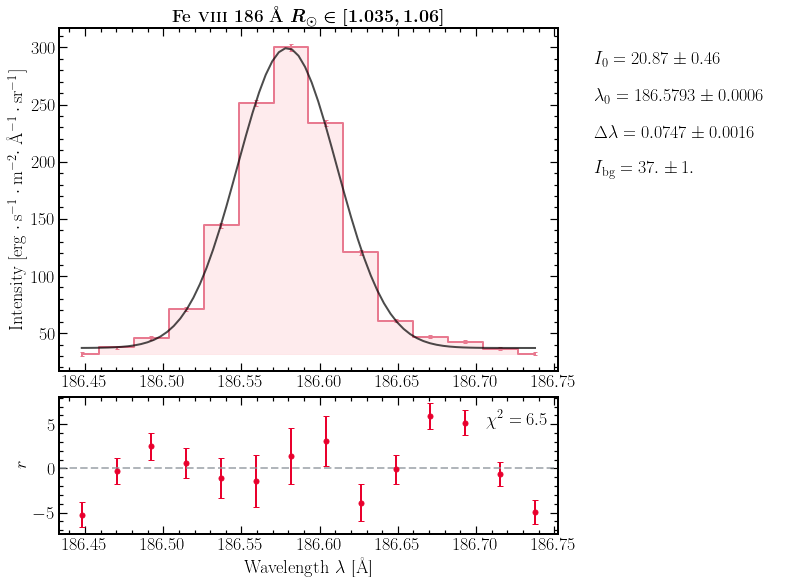

In [43]:
FeVIII_186_fitmodel_r1 = SpectrumFitSingle(data=FeVIII_186_data_aver_r1, wvl=FeVIII_186_wvl,err=FeVIII_186_err_aver_r1,
                                        line_number=1,line_wvl_init=[186.6],int_max_init=[5e2],fwhm_init=[0.07],
                                        )
FeVIII_186_fitmodel_r1.run_lse(absolute_sigma=False)
FeVIII_186_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 45.0 mÅ


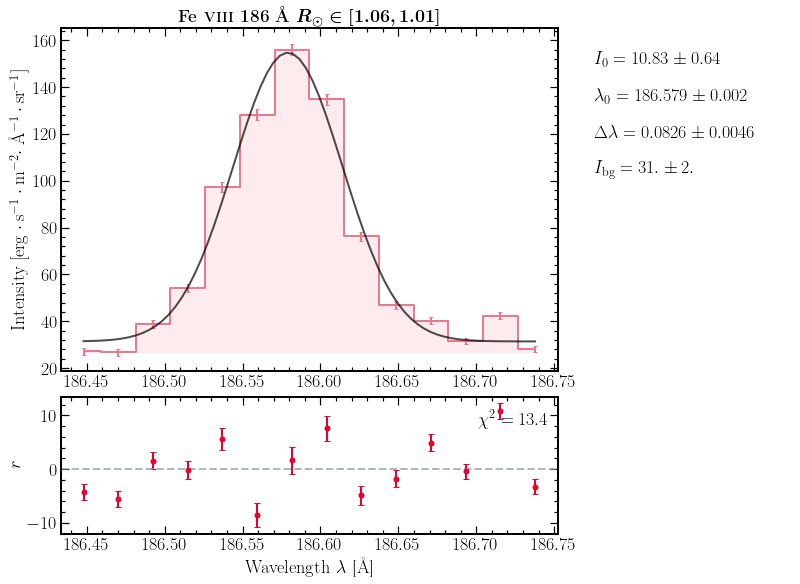

In [44]:
FeVIII_186_fitmodel_r2 = SpectrumFitSingle(data=FeVIII_186_data_aver_r2, wvl=FeVIII_186_wvl,err=FeVIII_186_err_aver_r2,
                                        line_number=1,line_wvl_init=[186.6],int_max_init=[5e2],fwhm_init=[0.07],
                                        )
FeVIII_186_fitmodel_r2.run_lse(absolute_sigma=False)
FeVIII_186_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.01]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 29.4 mÅ


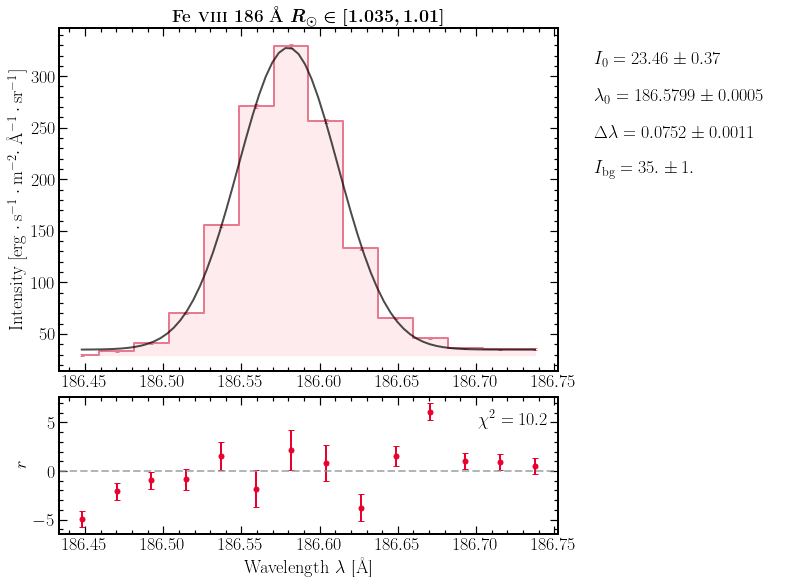

In [46]:
FeVIII_186_fitmodel_all = SpectrumFitSingle(data=FeVIII_186_data_aver_all, wvl=FeVIII_186_wvl,err=FeVIII_186_err_aver_all,
                                        line_number=1,line_wvl_init=[186.6],int_max_init=[5e2],fwhm_init=[0.07],
                                        )
FeVIII_186_fitmodel_all.run_lse(absolute_sigma=False)
FeVIII_186_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.01]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [47]:
FeXII_186_slice = slice(910,930)
FeXII_186_wvl = wvl_cube_0[FeXII_186_slice]

FeXII_186_region_1, FeXII_186_region_2 = return_mask(np.mean(ccd_offset_0[FeXII_186_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXII_186_data_region_1 = data_cube_0[FeXII_186_region_1[0],FeXII_186_region_1[1],FeXII_186_slice]
FeXII_186_data_region_2 = data_cube_0[FeXII_186_region_2[0],FeXII_186_region_2[1],FeXII_186_slice]
FeXII_186_err_region_1 = err_cube_0[FeXII_186_region_1[0],FeXII_186_region_1[1],FeXII_186_slice]
FeXII_186_err_region_2 = err_cube_0[FeXII_186_region_2[0],FeXII_186_region_2[1],FeXII_186_slice]

FeXII_186_data_aver_r1 = np.nanmean(FeXII_186_data_region_1, axis=0)
FeXII_186_data_aver_r2 = np.nanmean(FeXII_186_data_region_2, axis=0)
FeXII_186_data_aver_all = np.nanmean(data_cube_0[:,:,FeXII_186_slice], axis=(0,1))

FeXII_186_err_aver_r1 = np.sqrt(np.nanmean(FeXII_186_err_region_1**2,axis=0))/np.sqrt(FeXII_186_err_region_1.shape[0])
FeXII_186_err_aver_r2 = np.sqrt(np.nanmean(FeXII_186_err_region_2**2,axis=0))/np.sqrt(FeXII_186_err_region_2.shape[0])
FeXII_186_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeXII_186_slice]**2,axis=(0,1)))/np.sqrt(160*16)

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xii} 186 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.06]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

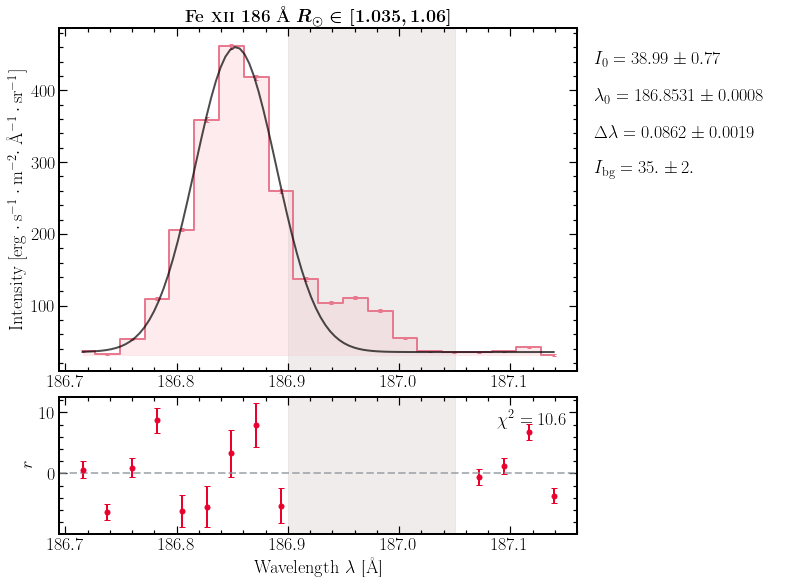

In [26]:
FeXII_186_fitmodel_r1 = SpectrumFitSingle(data=FeXII_186_data_aver_r1, wvl=FeXII_186_wvl,err=FeXII_186_err_aver_r1,
                                        line_number=1,line_wvl_init=[186.88],int_max_init=[5e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[186.9,187.05]])
# FeXII_186_fitmodel_r1.plot(plot_fit=False)
FeXII_186_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_186_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xii} 186 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.06,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

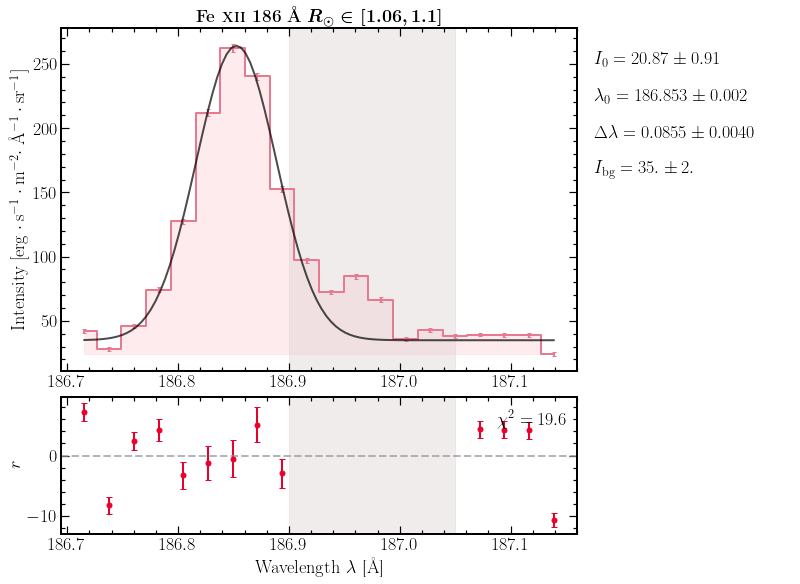

In [51]:
FeXII_186_fitmodel_r2 = SpectrumFitSingle(data=FeXII_186_data_aver_r2, wvl=FeXII_186_wvl,err=FeXII_186_err_aver_r2,
                                        line_number=1,line_wvl_init=[186.88],int_max_init=[3e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[186.9,187.05]])
# FeXII_186_fitmodel_r2.plot(plot_fit=False)
FeXII_186_fitmodel_r2.run_lse(absolute_sigma=False)
FeXII_186_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xii} 186 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

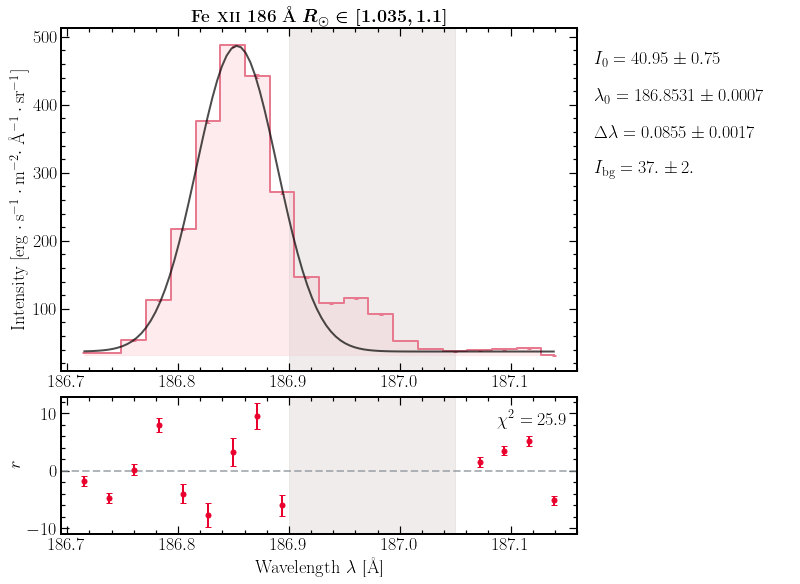

In [52]:
FeXII_186_fitmodel_all = SpectrumFitSingle(data=FeXII_186_data_aver_all, wvl=FeXII_186_wvl,err=FeXII_186_err_aver_all,
                                        line_number=1,line_wvl_init=[186.88],int_max_init=[5e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[186.9,187.05]])
# FeXII_186_fitmodel_all.plot(plot_fit=False)
FeXII_186_fitmodel_all.run_lse(absolute_sigma=False)
FeXII_186_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

In [50]:
FeXI_188_slice = slice(970,1000)
FeXI_188_wvl = wvl_cube_0[FeXI_188_slice]

FeXI_188_region_1, FeXI_188_region_2 = return_mask(np.mean(ccd_offset_0[FeXI_188_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXI_188_data_region_1 = data_cube_0[FeXI_188_region_1[0],FeXI_188_region_1[1],FeXI_188_slice]
FeXI_188_data_region_2 = data_cube_0[FeXI_188_region_2[0],FeXI_188_region_2[1],FeXI_188_slice]
FeXI_188_err_region_1 = err_cube_0[FeXI_188_region_1[0],FeXI_188_region_1[1],FeXI_188_slice]
FeXI_188_err_region_2 = err_cube_0[FeXI_188_region_2[0],FeXI_188_region_2[1],FeXI_188_slice]

FeXI_188_data_aver_r1 = np.nanmean(FeXI_188_data_region_1, axis=0)
FeXI_188_data_aver_r2 = np.nanmean(FeXI_188_data_region_2, axis=0)
FeXI_188_data_aver_all = np.nanmean(data_cube_0[:,:,FeXI_188_slice], axis=(0,1))

FeXI_188_err_aver_r1 = np.sqrt(np.nanmean(FeXI_188_err_region_1**2,axis=0))/np.sqrt(FeXI_188_err_region_1.shape[0])
FeXI_188_err_aver_r2 = np.sqrt(np.nanmean(FeXI_188_err_region_2**2,axis=0))/np.sqrt(FeXI_188_err_region_2.shape[0])
FeXI_188_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeXI_188_slice]**2,axis=(0,1)))/np.sqrt(160*16)